In [93]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [95]:
# === 2️⃣ Load Dataset ===
df = pd.read_csv("statewise us final dataset 20-23.csv")

In [97]:
# === 3️⃣ Basic Info ===
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

Shape of dataset: (14688, 8)

Columns:
 Index(['state', 'quarter', 'housing_price_growth', 'stringency_index',
       'deaths_per_million', 'gdp_growth', 'average_interest_rate',
       'unemployment_rate'],
      dtype='object')

Data types:
 state                     object
quarter                   object
housing_price_growth     float64
stringency_index         float64
deaths_per_million       float64
gdp_growth               float64
average_interest_rate    float64
unemployment_rate        float64
dtype: object

First 5 rows:
      state quarter  housing_price_growth  stringency_index  \
0  alabama  2020Q1              0.780844         15.898242   
1  alabama  2020Q1              0.780844         15.898242   
2  alabama  2020Q1              0.780844         15.898242   
3  alabama  2020Q1              0.780844         15.898242   
4  alabama  2020Q1              0.780844         15.898242   

   deaths_per_million  gdp_growth  average_interest_rate  unemployment_rate  
0          

In [99]:
# === 4️⃣ Missing Values Check ===
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 state                       0
quarter                     0
housing_price_growth        0
stringency_index         3888
deaths_per_million       2754
gdp_growth                  0
average_interest_rate       0
unemployment_rate           0
dtype: int64


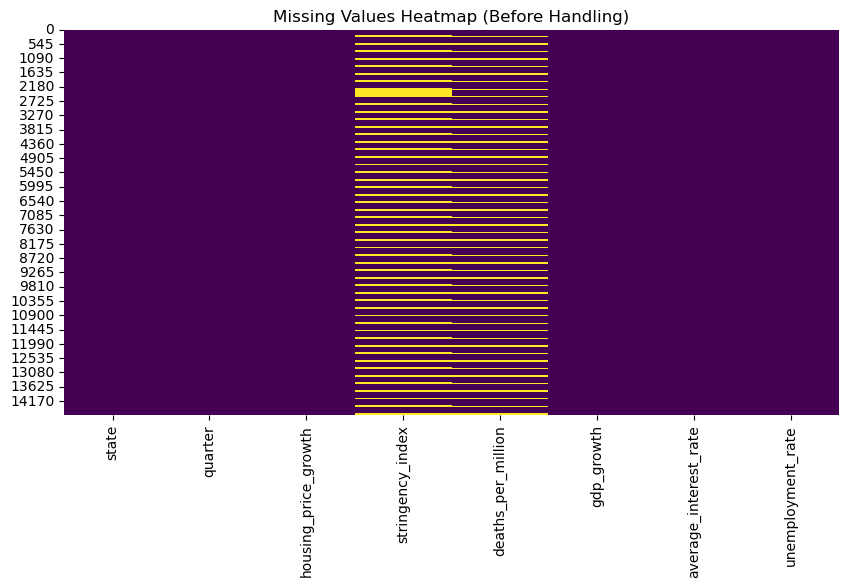

In [101]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (Before Handling)")
plt.show()

In [102]:
# === 4️⃣ Missing Values Handling ===
print("\nMissing Values Before:\n", df.isnull().sum())

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numeric columns with median (robust against outliers)
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing Values After:\n", df.isnull().sum())


Missing Values Before:
 state                       0
quarter                     0
housing_price_growth        0
stringency_index         3888
deaths_per_million       2754
gdp_growth                  0
average_interest_rate       0
unemployment_rate           0
dtype: int64

Missing Values After:
 state                    0
quarter                  0
housing_price_growth     0
stringency_index         0
deaths_per_million       0
gdp_growth               0
average_interest_rate    0
unemployment_rate        0
dtype: int64


C:\Users\noora\AppData\Local\Temp\ipykernel_5284\1071516498.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\noora\AppData\Local\Temp\ipykernel_5284\1071516498.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

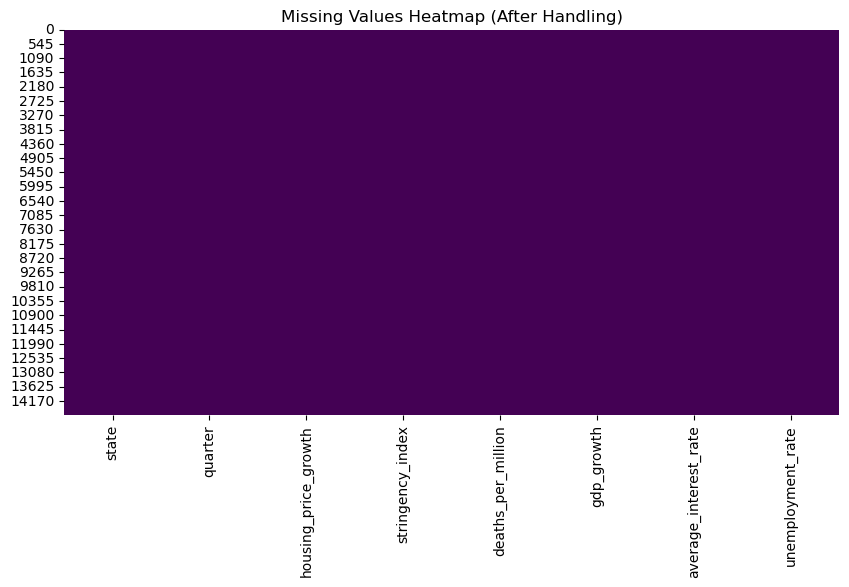

In [103]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (After Handling)")
plt.show()

In [106]:

# === 5️⃣ Statistical Summary ===
print("\nDescriptive Statistics:\n", df.describe(include='all'))


Descriptive Statistics:
           state quarter  housing_price_growth  stringency_index  \
count     14688   14688          14688.000000      14688.000000   
unique       51      16                   NaN               NaN   
top     alabama  2020Q1                   NaN               NaN   
freq        288     918                   NaN               NaN   
mean        NaN     NaN              0.701301         35.824876   
std         NaN     NaN              0.743545         16.295670   
min         NaN     NaN             -1.600277         13.561978   
25%         NaN     NaN              0.194060         23.934916   
50%         NaN     NaN              0.628134         29.936957   
75%         NaN     NaN              1.228320         45.732698   
max         NaN     NaN              3.725640         88.632198   

        deaths_per_million    gdp_growth  average_interest_rate  \
count         14688.000000  14688.000000           14688.000000   
unique                 NaN         

In [109]:
# === 6️⃣ Detect & Handle Outliers (Z-score method) ===
numeric_cols = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))

In [111]:
threshold = 3  # usual cutoff for outliers
outliers = (z_scores > threshold)
print("\nOutliers detected per column:")
print(outliers.sum())


Outliers detected per column:
housing_price_growth      72
stringency_index          54
deaths_per_million         0
gdp_growth               378
average_interest_rate    234
unemployment_rate        336
dtype: int64


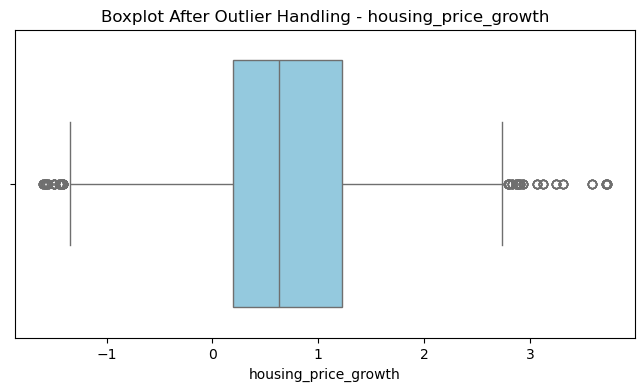

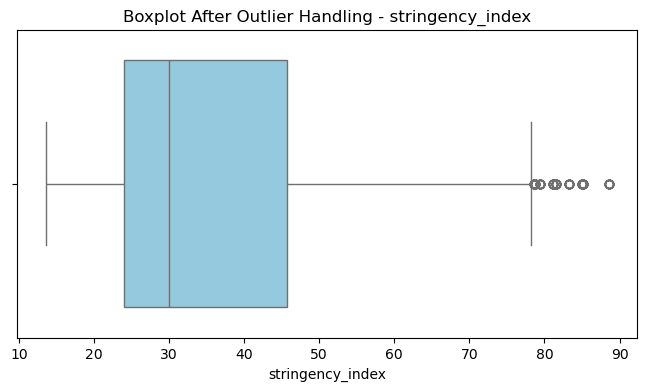

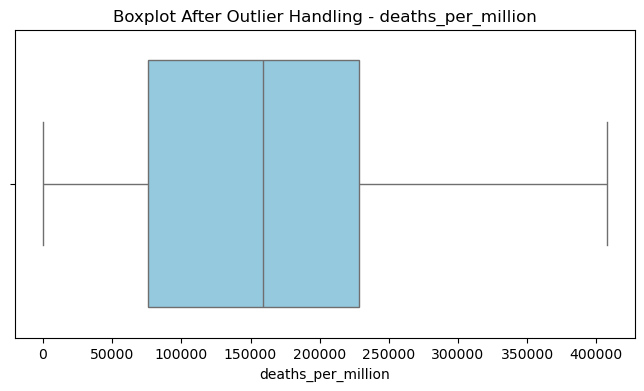

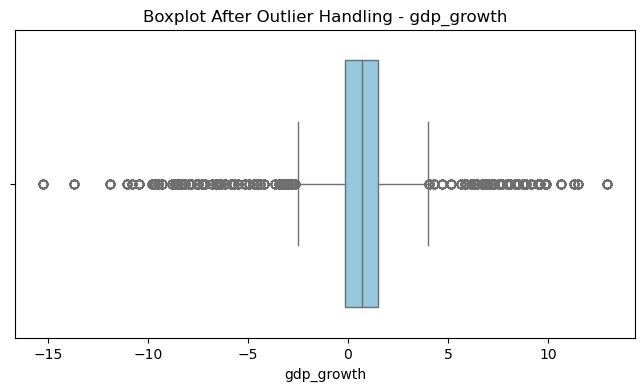

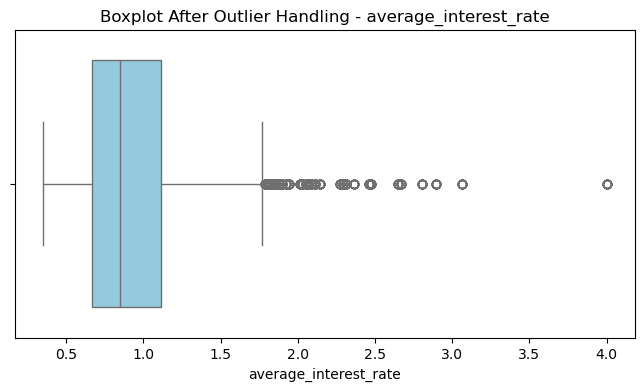

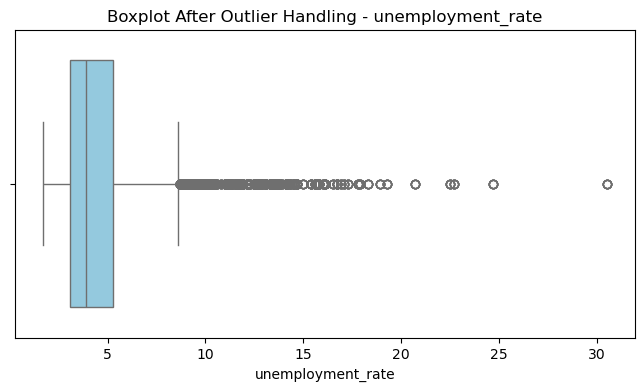

In [113]:

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot After Outlier Handling - {col}")
    plt.show()

In [117]:
#=== 5️⃣ Outlier Handling using IQR ===
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = np.where(data[col] < lower_bound, lower_bound,
                             np.where(data[col] > upper_bound, upper_bound, data[col]))
    return data

df = remove_outliers_iqr(df, num_cols)
print("\nOutliers handled using IQR method.")


Outliers handled using IQR method.


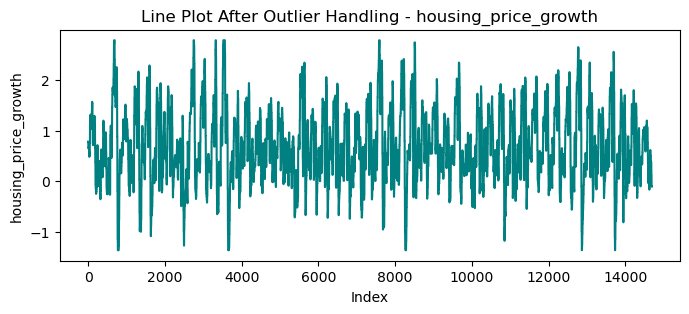

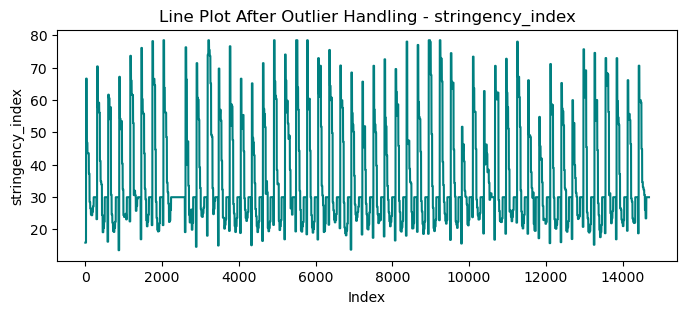

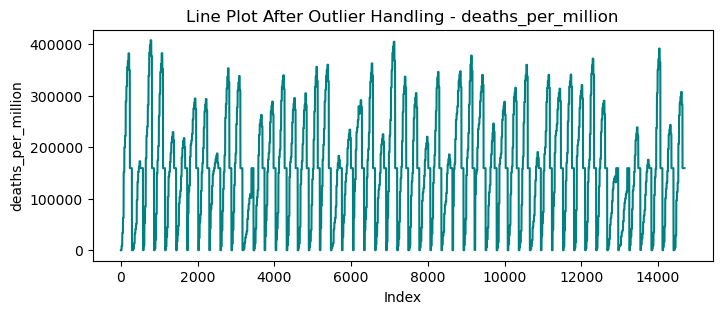

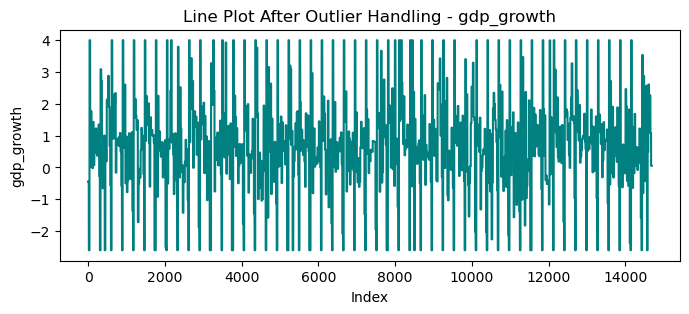

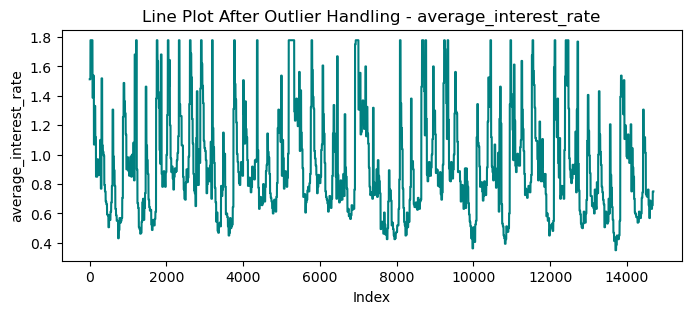

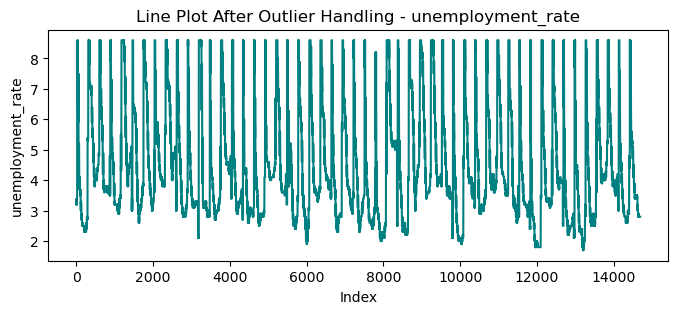

In [119]:
for col in num_cols:
    plt.figure(figsize=(8, 3))
    plt.plot(df[col].values, color='teal')
    plt.title(f"Line Plot After Outlier Handling - {col}")
    plt.xlabel("Index")
    plt.ylabel(col)
    plt.show()


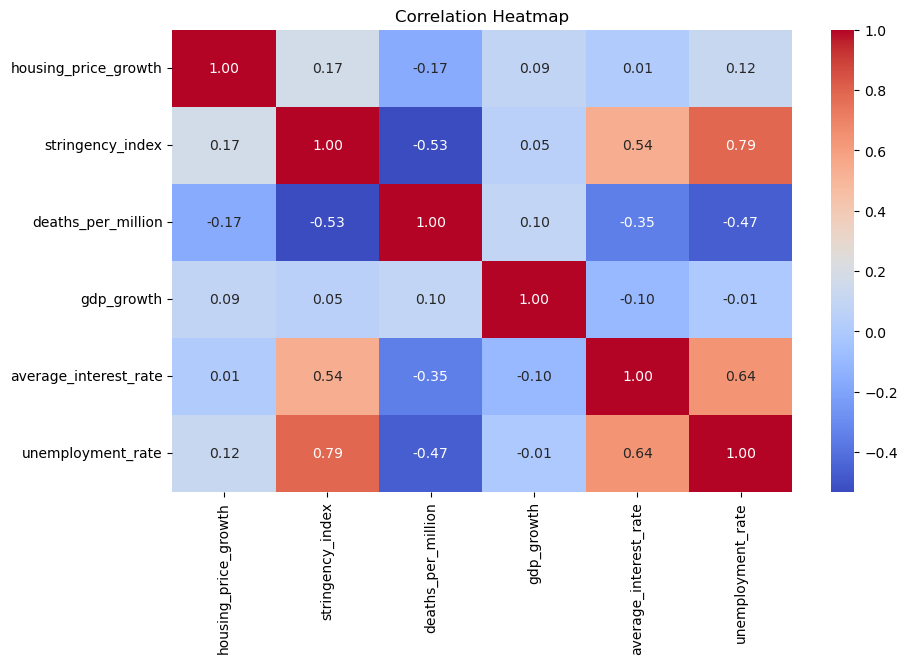

In [121]:
# === 7️⃣ Correlation Matrix ===
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

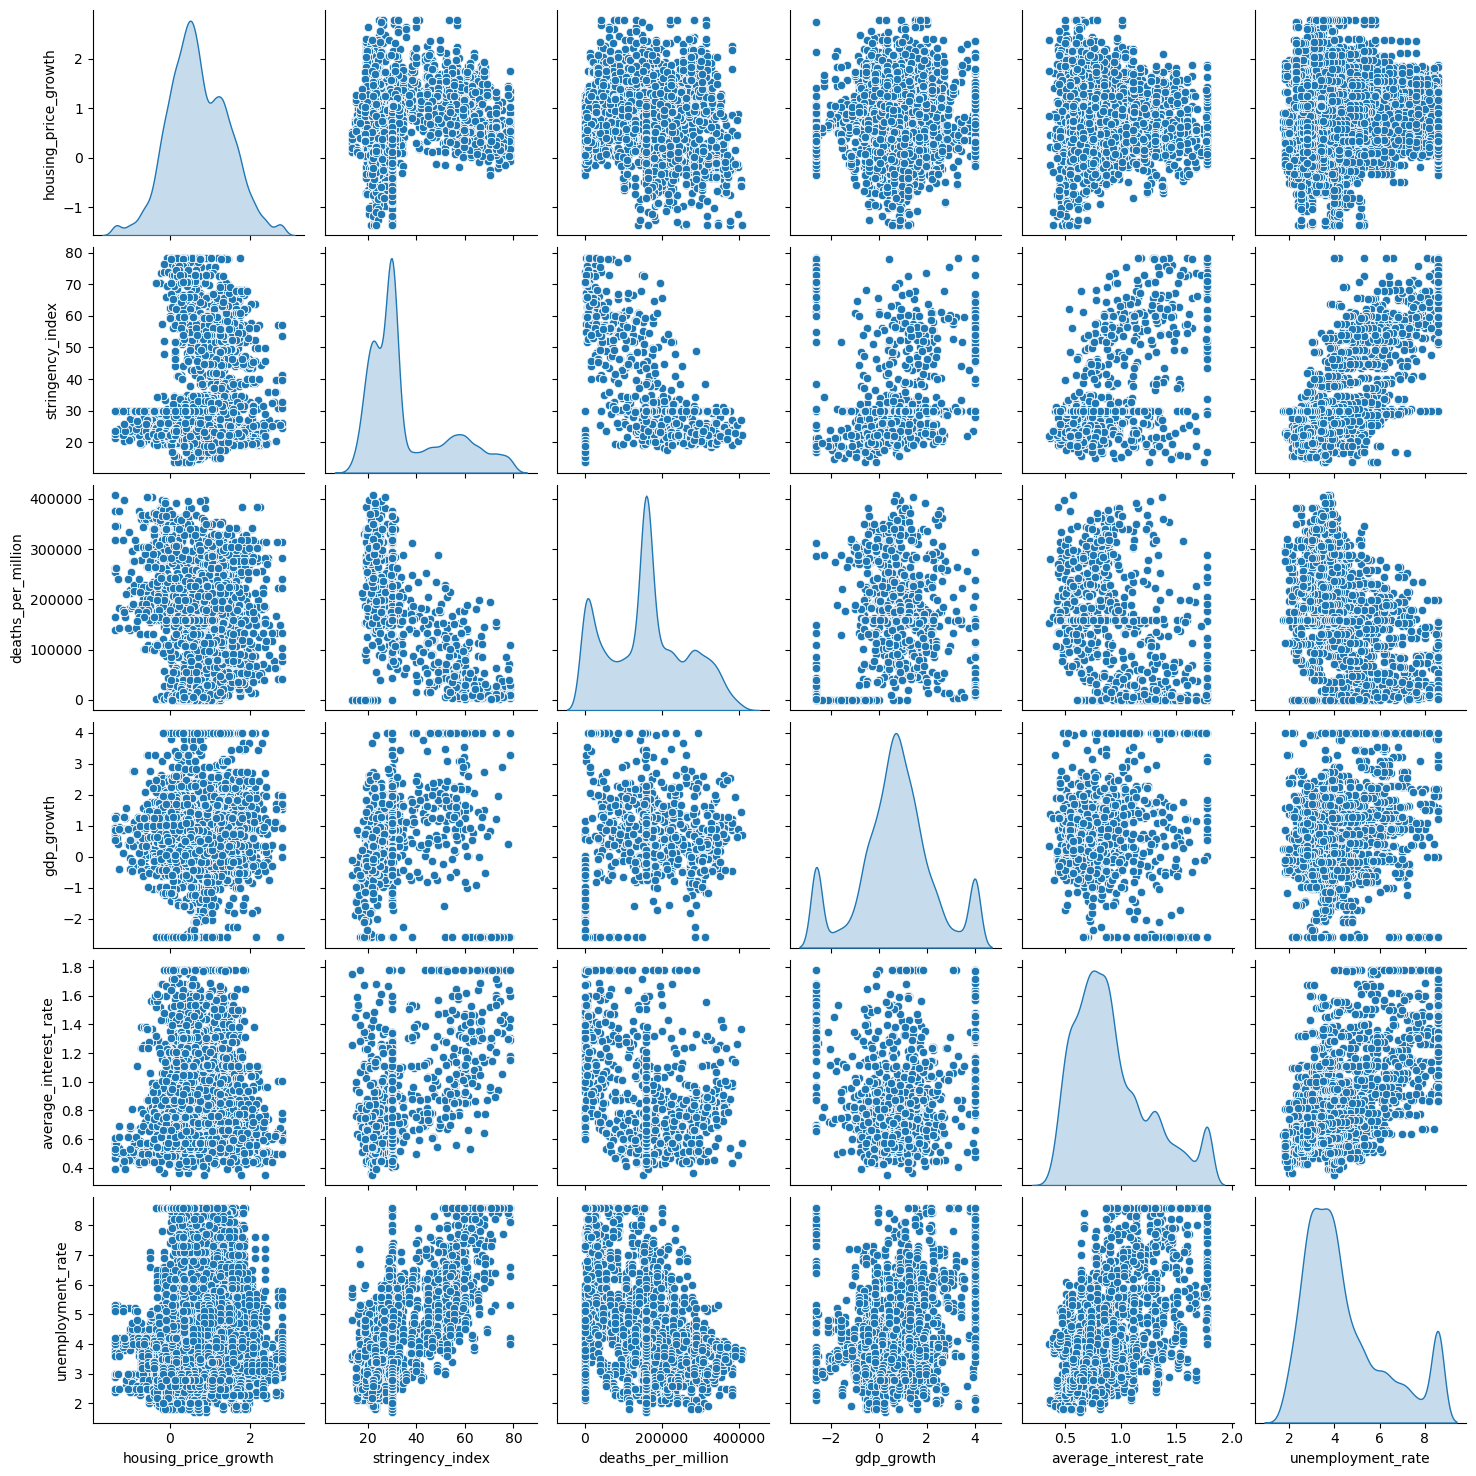

In [123]:
# === 8️⃣ Pairplot for Numeric Relationships ===
sns.pairplot(df[numeric_cols], diag_kind='kde')
plt.show()

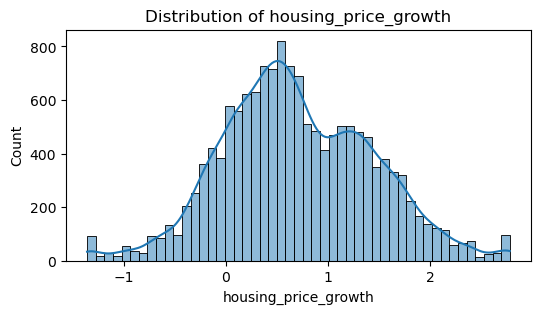

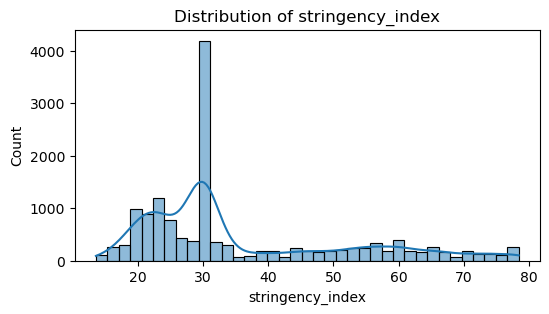

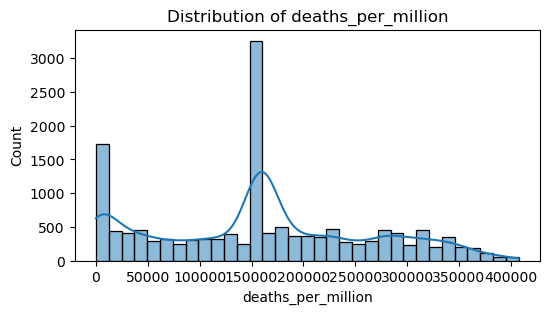

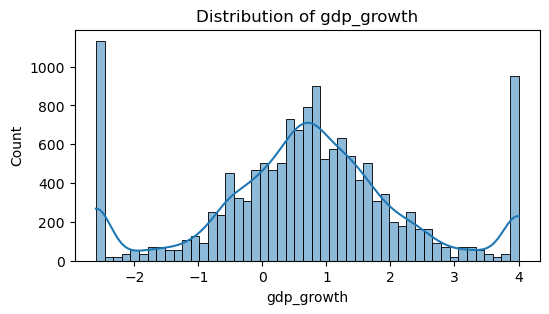

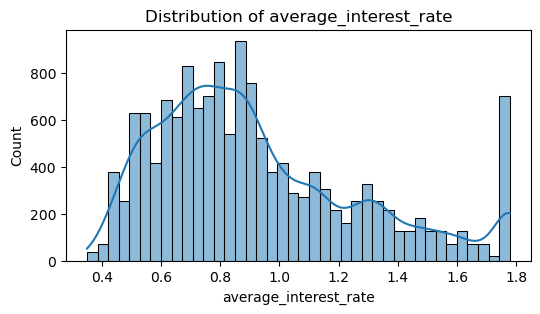

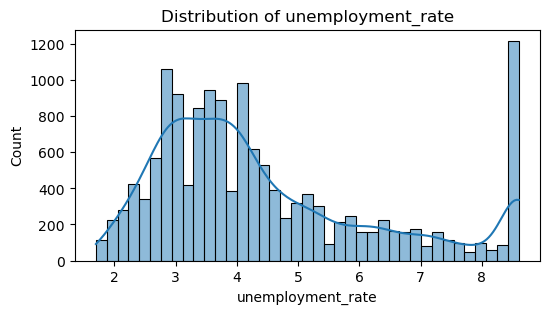

In [124]:
# === 9️⃣ Distribution Plots ===
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [125]:
# === 🔟 Categorical Value Counts ===
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


Value counts for state:
 state
alabama                 288
pennsylvania            288
nevada                  288
new hampshire           288
new jersey              288
new mexico              288
new york                288
north carolina          288
north dakota            288
ohio                    288
oklahoma                288
oregon                  288
rhode island            288
montana                 288
south carolina          288
south dakota            288
tennessee               288
texas                   288
utah                    288
vermont                 288
virginia                288
washington              288
west virginia           288
wisconsin               288
nebraska                288
missouri                288
alaska                  288
idaho                   288
arizona                 288
arkansas                288
california              288
colorado                288
connecticut             288
delaware                288
district of colu

In [126]:
# === ✅ Final Dataset Info ===
print("\nFinal Dataset Shape:", df.shape)
print("\nEDA Completed ✅")


Final Dataset Shape: (14688, 8)

EDA Completed ✅


In [133]:
try:
    final_df = df_scaled.copy()
except NameError:
    final_df = df.copy()

# Save as CSV
final_df.to_csv("statewise_us_final_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as 'statewise_us_final_cleaned.csv'")


✅ Cleaned dataset saved as 'statewise_us_final_cleaned.csv'


In [135]:
# Save as Excel
final_df.to_excel("statewise_us_final_cleaned.xlsx", index=False)
print("✅ Cleaned dataset saved as 'statewise_us_final_cleaned.xlsx'")

✅ Cleaned dataset saved as 'statewise_us_final_cleaned.xlsx'
